In [1]:
import pandas as pd

FILE_PATH = 'dados.csv'

df = pd.read_csv(FILE_PATH)
df.head(4)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158


# Divisão de classes por salário - Salário mínimo 788.00 BRL (2015)
***

##
A -> Acima de 15.760

B -> De 7.880 a 15.760

C -> De 3.152 a 7.880

D -> De 1.576 a 3.152

E -> Até 1.576

#

In [2]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels  = ['E', 'D', 'C', 'B', 'A']

In [3]:
# df_classes = (pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True)).value_counts()
ss_classes = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True))
ss_classes

Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [4]:
percent_classes = pd.value_counts(pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True), normalize=True) * 100
percent_classes

Renda
E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: proportion, dtype: float64

In [5]:
df_classes = pd.DataFrame({'Frequency': ss_classes, 'Percentual': percent_classes})
df_classes.sort_index(ascending=False, inplace=True)
df_classes

,Frequency,Percentual
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [6]:
n = df.shape[0]
n

76840

In [7]:
import numpy as np

# Sturges rule
k = 1 + (10 / 3) * np.log10(n)
k

17.285291187298853

In [8]:
k = int(k.round(0))
k

17

In [11]:
fq_sturges = pd.value_counts(pd.cut(x=df['Renda'], bins=17), sort=False)
fq_sturges

Renda
(-200.0, 11764.706]         75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [12]:
pc_sturges = pd.value_counts(pd.cut(x=df['Renda'], bins=17), sort=False, normalize=True) * 100
pc_sturges

Renda
(-200.0, 11764.706]         98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: proportion, dtype: float64

In [14]:
df_sturges = pd.DataFrame({'Frequency': fq_sturges, 'Percentual': pc_sturges})
df_sturges

,Frequency,Percentual
Renda,,
"(-200.0, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808


C:\Users\jeanl\AppData\Local\Temp\ipykernel_13748\2053772169.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Altura'], kde=False)


<Axes: title={'center': 'Frequency Distribution - Height'}, xlabel='Metros'>

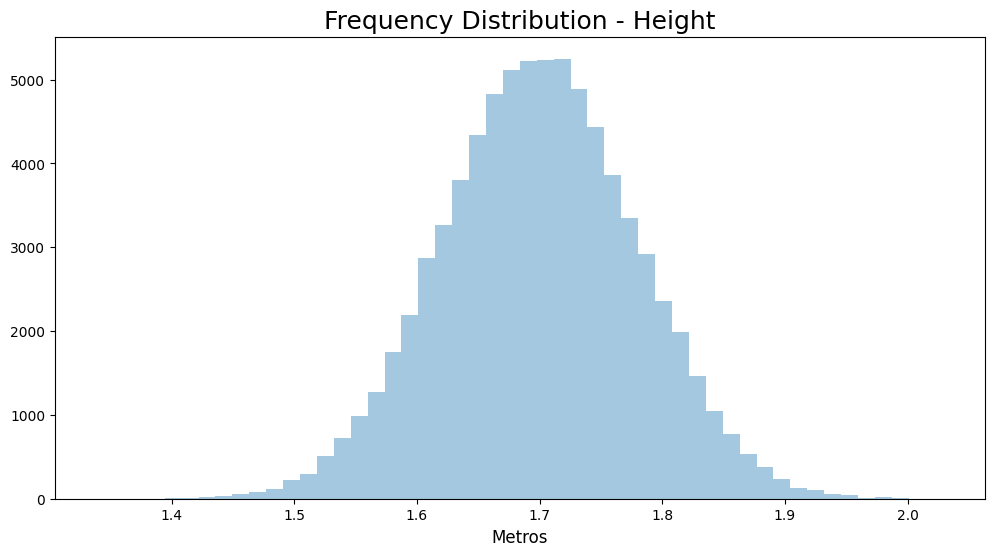

In [21]:
import seaborn as sns

ax = sns.distplot(df['Altura'], kde=False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Height', fontsize=18)
ax.set_xlabel('Metros', fontsize=12)
ax

C:\Users\jeanl\AppData\Local\Temp\ipykernel_13748\4169175956.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Altura'])


<Axes: title={'center': 'Frequency Distribution - Height KDE'}, xlabel='Metros', ylabel='Density'>

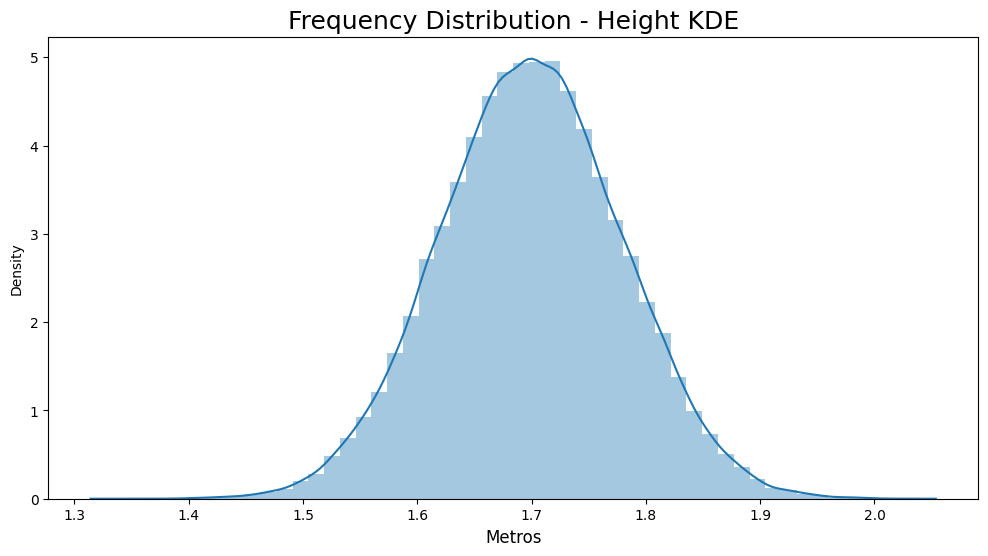

In [22]:
ax = sns.distplot(df['Altura'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Height KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=12)
ax

<Axes: >

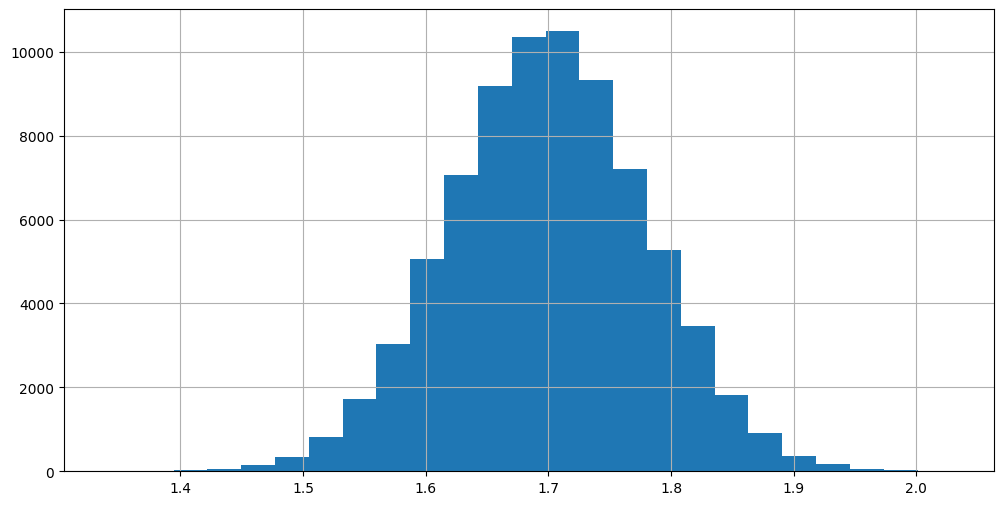

In [27]:
df['Altura'].hist(bins=25, figsize=(12, 6))

<Axes: xlabel='Renda'>

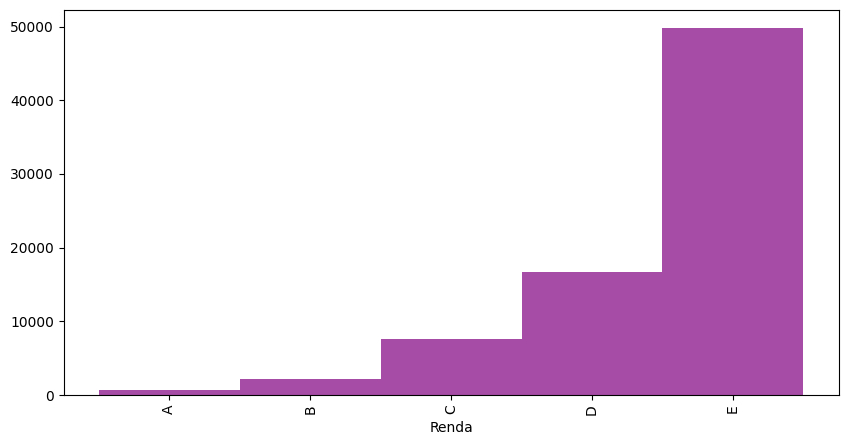

In [36]:
df_classes['Frequency'].plot.bar(width=1, color='purple', alpha=0.7, figsize=(10, 5))